In [78]:
import pandas as pd 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import pickle 

In [3]:
df = pd.read_csv("fake_job_postings.csv")

In [4]:
df.shape

(17880, 18)

In [5]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [91]:
print(cv_res2.sort_values(by = "rank_test_score").head())

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7        0.798794      0.110957         0.065994        0.005925   
11       0.622309      0.045445         0.052002        0.012352   
12       0.996637      0.160967         0.073142        0.015811   
13       1.391434      0.160974         0.093770        0.010116   
14       1.892518      0.042555         0.119162        0.015181   

   param_randomforestclassifier__max_depth  \
7                                       10   
11                                      15   
12                                      15   
13                                      15   
14                                      15   

   param_randomforestclassifier__n_estimators  \
7                                          50   
11                                         25   
12                                         50   
13                                         75   
14                                        100   

                   

In [6]:
sample = df[["title", "location", "salary_range", "telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function", "fraudulent"]]

In [7]:
sample.head()

,title,location,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [8]:
sample["location"] = sample.location.str.split(",", expand = True)[0]

C:\Users\User\AppData\Local\Temp\ipykernel_12708\2718842681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["location"] = sample.location.str.split(",", expand = True)[0]


In [9]:
sample.drop(columns = "salary_range", inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_12708\3781867144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.drop(columns = "salary_range", inplace = True)


In [10]:
sample

,title,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,US,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,NZ,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),US,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,US,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,US,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,CA,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,US,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,US,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,NG,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


<AxesSubplot:>

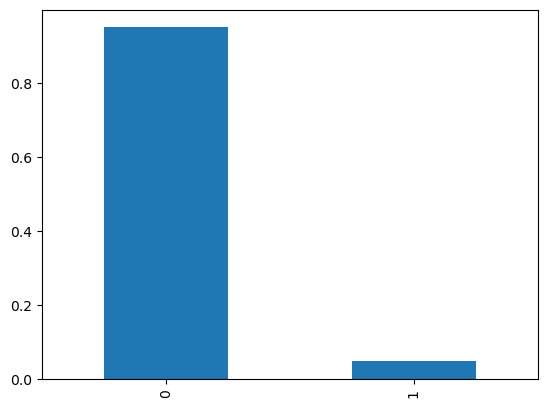

In [11]:
sample.fraudulent.value_counts(normalize = True).plot(kind = "bar")

In [12]:
sample.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [13]:
sample.corr()

,telecommuting,has_company_logo,has_questions,fraudulent
telecommuting,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.019836,1.000000,0.233932,-0.261971
has_questions,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.034523,-0.261971,-0.091627,1.000000


<AxesSubplot:xlabel='required_education'>

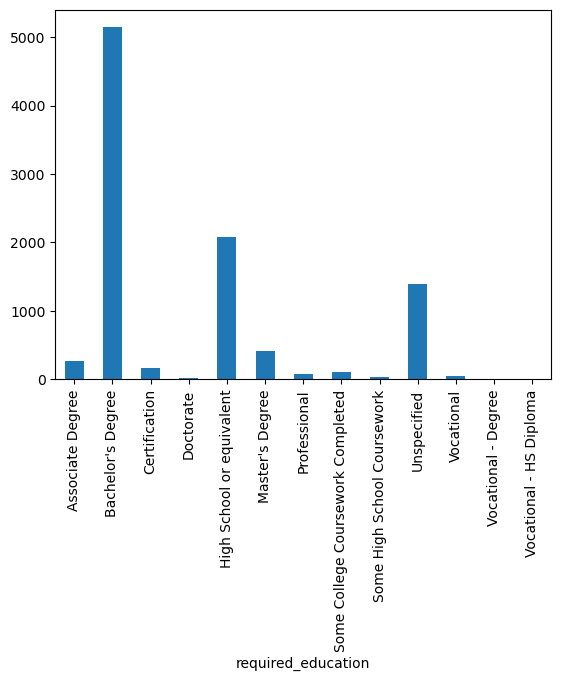

In [14]:
sample.groupby("required_education").count().fraudulent.plot(kind = "bar")

<AxesSubplot:xlabel='required_experience'>

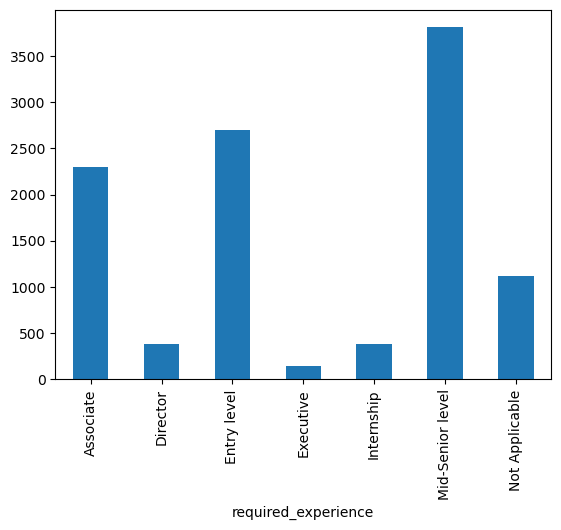

In [15]:
sample.groupby("required_experience").count().fraudulent.plot(kind = "bar")

<AxesSubplot:xlabel='location'>

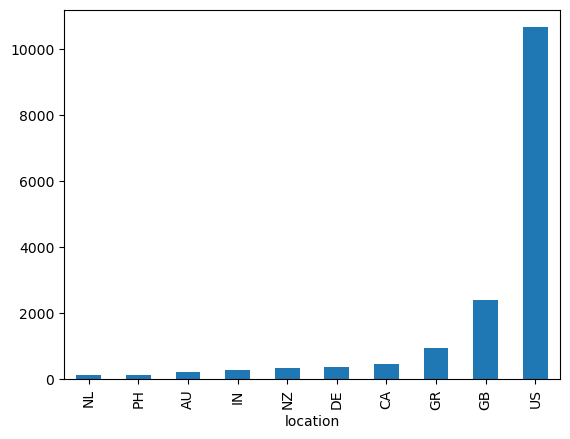

In [16]:
sample.groupby("location").count().fraudulent.sort_values().tail(10).plot(kind = "bar")

In [17]:
sample.isna().sum() > (len(sample)/4)

title                  False
location               False
telecommuting          False
has_company_logo       False
has_questions          False
employment_type        False
required_experience     True
required_education      True
industry                True
function                True
fraudulent             False
dtype: bool

In [18]:
sample.drop(columns = ["required_experience", "required_education", "industry", "function"], inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_12708\2052651609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.drop(columns = ["required_experience", "required_education", "industry", "function"], inplace = True)


In [19]:
sample.head()

,title,location,telecommuting,has_company_logo,has_questions,employment_type,fraudulent
0,Marketing Intern,US,0,1,0,Other,0
1,Customer Service - Cloud Video Production,NZ,0,1,0,Full-time,0
2,Commissioning Machinery Assistant (CMA),US,0,1,0,NaN,0
3,Account Executive - Washington DC,US,0,1,0,Full-time,0
4,Bill Review Manager,US,0,1,1,Full-time,0


In [20]:
sample.title.nunique()

11231

In [21]:
sample.drop(columns = "title", inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_12708\1866618690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.drop(columns = "title", inplace = True)


In [22]:
sample.dropna(inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_12708\1847533583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.dropna(inplace = True)


In [23]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14277 entries, 0 to 17879
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   location          14277 non-null  object
 1   telecommuting     14277 non-null  int64 
 2   has_company_logo  14277 non-null  int64 
 3   has_questions     14277 non-null  int64 
 4   employment_type   14277 non-null  object
 5   fraudulent        14277 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 780.8+ KB


In [24]:
target = "fraudulent"
y = sample[target]
X = sample.drop(columns = target)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
X_train.shape, X_test.shape

((11421, 5), (2856, 5))

In [27]:
params= {"svc__kernel":("linear", "poly"), "svc__C":[0.1, 1, 10], "svc__degree":[2, 3]}

clf2 = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SVC(random_state = 42)
)

In [28]:
model_svc = GridSearchCV(
    clf2,
    param_grid = params,
    cv = 5,
    n_jobs = -1
)

model_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__degree': [2, 3],
                         'svc__kernel': ('linear', 'poly')})

In [29]:
params2 = {"randomforestclassifier__n_estimators":[10, 25, 50, 75, 100], "randomforestclassifier__max_depth":[5, 10, 15]}

clf = make_pipeline( 
    OneHotEncoder(use_cat_names = True),
    RandomForestClassifier(random_state = 42)
)


In [30]:
model_forest = GridSearchCV(
    clf, 
    param_grid = params2,
    cv = 5, 
    n_jobs = -1
)

model_forest.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [5, 10, 15],
                         'randomforestclassifier__n_estimators': [10, 25, 50,
                                                                  75, 100]})

In [31]:
model_lreg = make_pipeline(
    OneHotEncoder(use_cat_names = True), 
    LogisticRegression(max_iter = 1000, random_state = 42)
)

In [32]:
model_lreg.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['location', 'employment_type'],
                               use_cat_names=True)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [33]:
acc_baseline = y_train.value_counts(normalize = True).max()
acc_baseline

0.9577094825321776

In [34]:
models = [model_svc, model_forest, model_lreg]

accs_train = []
accs_test = []

In [35]:
for val in models: 
    y_pred = val.predict(X_test)
    accs_train.append(val.score(X_train, y_train))
    accs_test.append(val.score(X_test, y_test))

In [36]:
accs_train

[0.9617371508624464, 0.9608615707906488, 0.9603362227475702]

In [37]:
accs_test

[0.9534313725490197, 0.9548319327731093, 0.9548319327731093]

In [38]:
cv_res1 = pd.DataFrame.from_dict(model_svc.cv_results_)
cv_res2 = pd.DataFrame.from_dict(model_forest.cv_results_)

In [39]:
cv_res1.sort_values(by = "rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__degree,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,2.334083,0.053201,0.266524,0.016085,10,3,poly,"{'svc__C': 10, 'svc__degree': 3, 'svc__kernel'...",0.959737,0.958406,0.959720,0.961033,0.962785,0.960336,0.001479,1
9,2.349340,0.127230,0.299196,0.014129,10,2,poly,"{'svc__C': 10, 'svc__degree': 2, 'svc__kernel'...",0.959737,0.958406,0.959282,0.960595,0.962785,0.960161,0.001490,2
5,2.092346,0.366723,0.287285,0.022438,1,2,poly,"{'svc__C': 1, 'svc__degree': 2, 'svc__kernel':...",0.960175,0.958844,0.960158,0.960158,0.961033,0.960074,0.000701,3
7,2.489486,0.321418,0.330473,0.032564,1,3,poly,"{'svc__C': 1, 'svc__degree': 3, 'svc__kernel':...",0.960175,0.958844,0.959720,0.959720,0.961471,0.959986,0.000859,4
4,2.175303,0.234818,0.277503,0.034530,1,2,linear,"{'svc__C': 1, 'svc__degree': 2, 'svc__kernel':...",0.957987,0.956655,0.957531,0.959282,0.958844,0.958060,0.000935,5


In [40]:
cv_res2.sort_values(by = "rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.798794,0.110957,0.065994,0.005925,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.960175,0.959720,0.960158,0.960595,0.962785,0.960686,0.001085,1
11,0.622309,0.045445,0.052002,0.012352,15,25,"{'randomforestclassifier__max_depth': 15, 'ran...",0.959737,0.959282,0.960158,0.961033,0.962785,0.960599,0.001236,2
12,0.996637,0.160967,0.073142,0.015811,15,50,"{'randomforestclassifier__max_depth': 15, 'ran...",0.960175,0.959282,0.959720,0.961033,0.962785,0.960599,0.001237,3
13,1.391434,0.160974,0.093770,0.010116,15,75,"{'randomforestclassifier__max_depth': 15, 'ran...",0.960175,0.959282,0.959720,0.961033,0.962785,0.960599,0.001237,3
14,1.892518,0.042555,0.119162,0.015181,15,100,"{'randomforestclassifier__max_depth': 15, 'ran...",0.960175,0.959282,0.959720,0.961033,0.962785,0.960599,0.001237,3


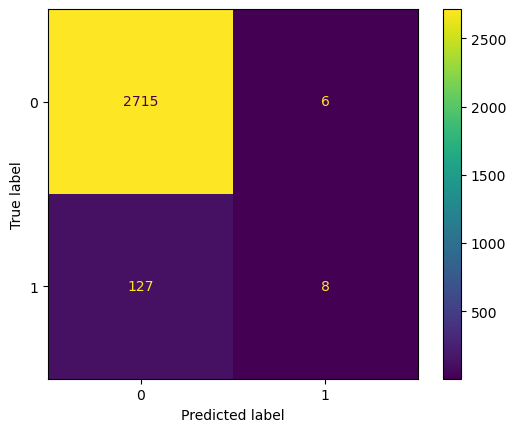

In [41]:
ConfusionMatrixDisplay.from_estimator(model_svc, X_test, y_test)

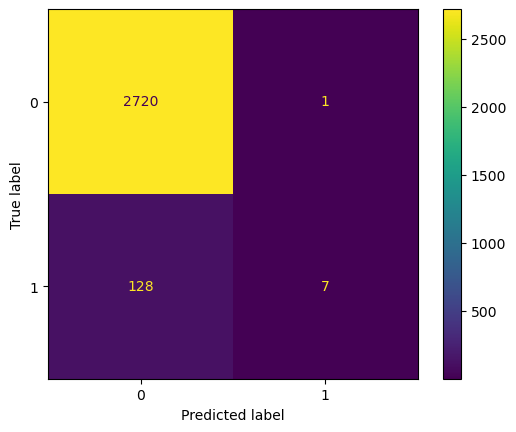

In [42]:
ConfusionMatrixDisplay.from_estimator(model_forest, X_test, y_test)

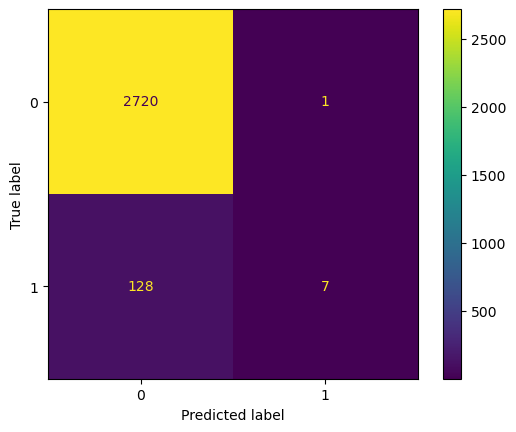

In [43]:
ConfusionMatrixDisplay.from_estimator(model_lreg, X_test, y_test)

In [44]:
y_test.value_counts()

0    2721
1     135
Name: fraudulent, dtype: int64

In [51]:
under_sampler = RandomUnderSampler()
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(966, 5)


,location,telecommuting,has_company_logo,has_questions,employment_type
0,GB,0,1,1,Full-time
1,US,0,1,0,Contract
2,US,0,1,0,Full-time
3,US,0,0,1,Full-time
4,US,0,1,1,Full-time


In [54]:
over_sampler = RandomOverSampler()
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(21876, 5)


,location,telecommuting,has_company_logo,has_questions,employment_type
0,US,0,1,1,Full-time
1,US,0,0,0,Full-time
2,US,0,1,1,Full-time
3,US,0,0,1,Full-time
4,US,0,1,1,Full-time


In [56]:
model_under = make_pipeline( 
    OneHotEncoder(use_cat_names = True),
    RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 42)
)
model_under.fit(X_train_under, y_train_under)

model_over = make_pipeline( 
    OneHotEncoder(use_cat_names = True),
    RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['location', 'employment_type'],
                               use_cat_names=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=50,
                                        random_state=42))])

In [57]:
sampling_accs = []
options = [model_under, model_over]
for val in options: 
    sampling_accs.append(val.score(X_test, y_test))

In [58]:
sampling_accs

[0.6911764705882353, 0.7107843137254902]

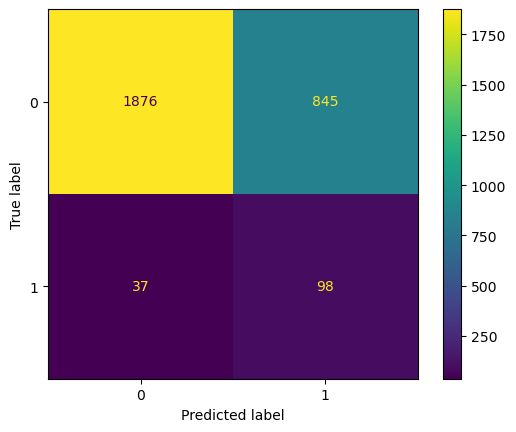

In [59]:
ConfusionMatrixDisplay.from_estimator(model_under, X_test, y_test)

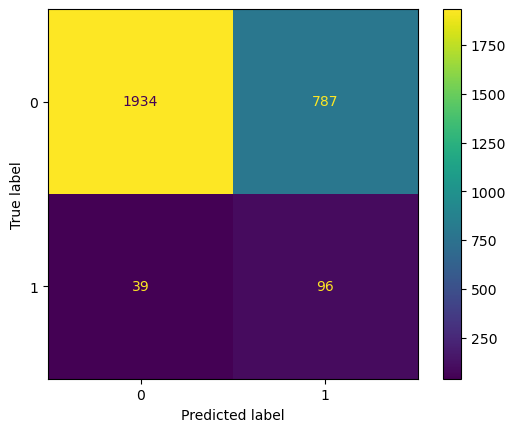

In [60]:
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test)

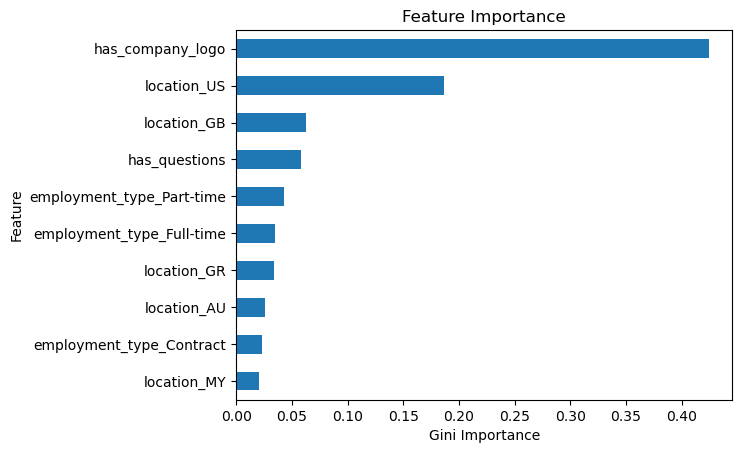

In [68]:
# Get feature names from training data
features = model_over.named_steps["randomforestclassifier"].feature_names_in_
# Extract importances from model
importances = model_over.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index = features)
# Plot 10 most important features
feat_imp.sort_values().tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [74]:
y_predict = model_over.predict_proba(X_test)

In [77]:
y_predict

array([[0.59880388, 0.40119612],
       [0.51282657, 0.48717343],
       [0.59880388, 0.40119612],
       ...,
       [0.83547384, 0.16452616],
       [0.46492404, 0.53507596],
       [0.94243062, 0.05756938]])

In [79]:
with open("finalmodel", "wb") as f:
    pickle.dump(model_over, f)